In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime, warnings, scipy
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

plt.style.use('seaborn-whitegrid')

In [68]:
df = pd.read_csv(r"C:\Users\Yamin Hossain\Downloads\archive\Combined_Flights_2022.csv")

# Check first 2 instances and last 2 instance
df.head(2).append(df.tail(2))

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,1228.0,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,848.0,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
4078316,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,939.0,NaN,NaN,86.0,NaN,319.0,2022,1,3,25,5,UA,UA_CODESHARE,19977,UA,3450,YX,20452,YX,N647RW,3450,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,14122,1412202,30198,"Pittsburgh, PA",PA,42,Pennsylvania,23,1.0,7.0,2100-2159,25.0,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1
4078317,2022-03-07,Republic Airlines,EWR,RDU,False,True,1154,1148.0,0.0,-6.0,1556.0,NaN,NaN,99.0,NaN,416.0,2022,1,3,7,1,UA,UA_CODESHARE,19977,UA,3585,YX,20452,YX,N648RW,3585,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,14492,1449202,34492,"Raleigh/Durham, NC",NC,37,North Carolina,36,0.0,-1.0,1100-1159,13.0,1201.0,1552.0,4.0,1333,NaN,NaN,NaN,1300-1359,2,1


## Data Exploration

In [69]:
# Check dimension of dataset
df.shape
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1]) +" columns from the flight dataset.")

There are 4078318 rows and 61 columns from the flight dataset.


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

## About all Columns
    FlightDate: Date of the flight
    Airline: Code for the airline
    Origin: Origin airport code
    Dest: Destination airport code
    Cancelled: Whether the flight was cancelled
    Diverted: Whether the flight was diverted
    CRSDepTime: Scheduled departure time
    DepTime: Actual departure time
    DepDelayMinutes: Departure delay in minutes
    DepDelay: Departure delay in minutes (including delay caused by earlier flights)
    ArrTime: Actual arrival time
    ArrDelayMinutes: Arrival delay in minutes
    AirTime: Duration of the flight
    CRSElapsedTime: Scheduled elapsed time
    ActualElapsedTime: Elapsed time of the flight
    Distance: Distance between origin and destination
    Year: Year of the flight
    Quarter: Quarter of the flight
    Month: Month of the flight
    DayofMonth: Day of the month of the flight
    DayOfWeek: Day of the week of the flight
    Marketing_Airline_Network: Code for the marketing airline network
    Operated_or_Branded_Code_Share_Partners: Code for the operating or branded code share partners
    DOT_ID_Marketing_Airline: DOT ID for the marketing airline
    IATA_Code_Marketing_Airline: IATA code for the marketing airline
    Flight_Number_Marketing_Airline: Flight number for the marketing airline
    Operating_Airline: Code for the operating airline
    DOT_ID_Operating_Airline: DOT ID for the operating airline
    IATA_Code_Operating_Airline: IATA code for the operating airline
    Tail_Number: Tail number of the aircraft
    Flight_Number_Operating_Airline: Flight number for the operating airline
    OriginAirportID: Origin airport ID
    OriginAirportSeqID: Origin airport sequence ID
    OriginCityMarketID: Origin city market ID
    OriginCityName: Name of the origin city
    OriginState: State of the origin airport
    OriginStateFips: FIPS code for the state of the origin airport
    OriginStateName: Name of the state of the origin airport
    OriginWac: WAC code for the origin airport
    DestAirportID: Destination airport ID
    DestAirportSeqID: Destination airport sequence ID
    DestCityMarketID: Destination city market ID
    DestCityName: Name of the destination city
    DestState: State of the destination airport
    DestStateFips: FIPS code for the state of the destination airport
    DestStateName: Name of the state of the destination airport
    DestWac: WAC code for the destination airport
    DepDel15: Whether the flight had a departure delay of 15 minutes or more
    DepartureDelayGroups: Departure delay group (in 15-minute increments)
    DepTimeBlk: Departure time block
    TaxiOut: Taxi-out time in minutes
    WheelsOff: Time when the aircraft wheels leave the ground
    WheelsOn: Time when the aircraft wheels touch the ground
    TaxiIn: Taxi-in time in minutes
    CRSArrTime: Scheduled arrival time
    ArrDelay: Arrival delay in minutes
    ArrDel15: Whether the flight had an arrival delay of 15 minutes or more
    ArrivalDelayGroups: Arrival delay group (in 15-minute increments)
    ArrTimeBlk: Arrival time block
    DistanceGroup: Distance group (in 250-mile increments)
    DivAirportLandings: Number of times the flight landed at a different airport than the scheduled one due

In [71]:
# Convert flight_data column to datetime format
df['FlightDate'] =  pd.to_datetime(df['FlightDate'], format='%Y-%m-%d')

##  Missing data

In [72]:
# drop rows where the Cancelled column is True
df = df.drop(df[df.Cancelled == True].index)

In [73]:
# drop rows where the Diverted column is True
df = df.drop(df[df.Diverted == True].index)

In [74]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """ 
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(df)

Proportion of missing data in columns
Empty DataFrame
Columns: [column_name, percentage]
Index: []



## Transformation of Duration time taken

Checking on the calculation for Departure Delay and Arrival Delay in minutes

The derivation of the delayed time of departure and delayed time of arrival is as shown below:

    DepDelay = CRSArrTime - DepTime
    ArrDelay = ArrTime - CRSTime


In [75]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')
    
    # pd.to_datetime(heure, format='%Y-%m-%d')

In [76]:
df['DepTime'] = df['DepTime'].apply(format_heure)
df['CRSDepTime'] = df['CRSDepTime'].apply(format_heure)

df['ArrTime'] = df['ArrTime'].apply(format_heure) 
df['CRSArrTime'] = df['CRSArrTime'].apply(format_heure)

df['WheelsOff'] = df['WheelsOff'].apply(format_heure)
df['WheelsOn'] = df['WheelsOn'].apply(format_heure)

Obtain duration of time taken for:

    Flight take off and wheels off
    Flight on land and wheels on

In [77]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str)) 
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

df['WHEELS_OFF_elapse'] =  time_difference(df['WheelsOff'],df['DepTime'])
df['WHEELS_ON_elapse'] =  time_difference(df['ArrTime'] ,df['WheelsOn'])

# Remove incorrect record
df=df[df['WHEELS_OFF_elapse']>0]
df=df[df['WHEELS_ON_elapse']>0]

In [78]:
import numpy as np

# check if WHEELS_OFF_elapse is equal to TAXI_OUT
check_wheels_off = np.isclose(df['WHEELS_OFF_elapse'], df['TaxiOut'], rtol=1e-05, atol=1e-08, equal_nan=True)

# check if WHEELS_ON_elapse is equal to TAXI_IN
check_wheels_on = np.isclose(df['WHEELS_ON_elapse'], df['TaxiIn'], rtol=1e-05, atol=1e-08, equal_nan=True)

# check if both are true for all rows
if all(check_wheels_off) and all(check_wheels_on):
    print("WHEELS_OFF_elapse and TAXI_OUT are equal for all rows")
    print("WHEELS_ON_elapse and TAXI_IN are equal for all rows")
else:
    print("WHEELS_OFF_elapse and TAXI_OUT are not equal for all rows")
    print("WHEELS_ON_elapse and TAXI_IN are not equal for all rows")

WHEELS_OFF_elapse and TAXI_OUT are not equal for all rows
WHEELS_ON_elapse and TAXI_IN are not equal for all rows


In [79]:
# Check first 2 instances and last 2 instances
df.head(2).append(df.tail(2))

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,11:33:00,11:23:00,0.0,-10.0,12:28:00,0.0,40.0,72.0,65.0,212.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4301,C5,20445,C5,N21144,4301,11921,1192102,31921,"Grand Junction, CO",CO,8,Colorado,82,11292,1129202,30325,"Denver, CO",CO,8,Colorado,82,0.0,-1.0,1100-1159,17.0,11:40:00,12:20:00,8.0,12:45:00,-17.0,0.0,-2.0,1200-1259,1,0,17.0,8.0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,07:32:00,07:28:00,0.0,-4.0,08:48:00,0.0,55.0,77.0,80.0,295.0,2022,2,4,4,1,UA,UA_CODESHARE,19977,UA,4299,C5,20445,C5,N16170,4299,12206,1220605,32206,"Harlingen/San Benito, TX",TX,48,Texas,74,12266,1226603,31453,"Houston, TX",TX,48,Texas,74,0.0,-1.0,0700-0759,16.0,07:44:00,08:39:00,9.0,08:49:00,-1.0,0.0,-1.0,0800-0859,2,0,16.0,9.0
4078312,2022-03-19,Republic Airlines,EWR,MEM,False,False,20:35:00,23:09:00,154.0,154.0,00:52:00,135.0,144.0,182.0,163.0,946.0,2022,1,3,19,6,UA,UA_CODESHARE,19977,UA,3484,YX,20452,YX,N728YX,3484,11618,1161802,31703,"Newark, NJ",NJ,34,New Jersey,21,13244,1324402,33244,"Memphis, TN",TN,47,Tennessee,54,1.0,10.0,2000-2059,14.0,23:23:00,00:47:00,5.0,22:37:00,135.0,1.0,9.0,2200-2259,4,0,14.0,5.0
4078315,2022-03-08,Republic Airlines,ALB,ORD,False,False,17:00:00,23:18:00,378.0,378.0,00:59:00,381.0,135.0,158.0,161.0,723.0,2022,1,3,8,2,UA,UA_CODESHARE,19977,UA,3413,YX,20452,YX,N733YX,3413,10257,1025702,30257,"Albany, NY",NY,36,New York,22,13930,1393007,30977,"Chicago, IL",IL,17,Illinois,41,1.0,12.0,1700-1759,19.0,23:37:00,00:52:00,7.0,18:38:00,381.0,1.0,12.0,1800-1859,3,0,19.0,7.0


In [80]:
# Check column type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3916092 entries, 0 to 4078315
Data columns (total 63 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   FlightDate                               datetime64[ns]
 1   Airline                                  object        
 2   Origin                                   object        
 3   Dest                                     object        
 4   Cancelled                                bool          
 5   Diverted                                 bool          
 6   CRSDepTime                               object        
 7   DepTime                                  object        
 8   DepDelayMinutes                          float64       
 9   DepDelay                                 float64       
 10  ArrTime                                  object        
 11  ArrDelayMinutes                          float64       
 12  AirTime                     

FlightDate,Airline,Origin,Dest,DepDelay,TaxiOut,TaxiIn,ArrDelay,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DepartureDelayGroups,ArrivalDelayGroups,WHEELS_OFF_elapse,WHEELS_ON_elapse

In [81]:
df = df[['FlightDate','Quarter','Month','DayofMonth','DayOfWeek','Airline', 'Origin','OriginStateName', 'Dest','DestStateName','Distance', 'Diverted','DepDelay','ArrDelay','AirTime','TaxiOut', 'TaxiIn', 'WHEELS_OFF_elapse', 'WHEELS_ON_elapse','CRSElapsedTime', 'ActualElapsedTime','DepartureDelayGroups','ArrivalDelayGroups']]


In [82]:
#Check number of missing values
df.isna().sum()

FlightDate              0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
Airline                 0
Origin                  0
OriginStateName         0
Dest                    0
DestStateName           0
Distance                0
Diverted                0
DepDelay                0
ArrDelay                0
AirTime                 0
TaxiOut                 0
TaxiIn                  0
WHEELS_OFF_elapse       0
WHEELS_ON_elapse        0
CRSElapsedTime          0
ActualElapsedTime       0
DepartureDelayGroups    0
ArrivalDelayGroups      0
dtype: int64

In [83]:
df.Airline.nunique()

21

In [84]:
df.Airline.value_counts()

Southwest Airlines Co.                       708833
Delta Air Lines Inc.                         495923
American Airlines Inc.                       471832
SkyWest Airlines Inc.                        429014
United Air Lines Inc.                        338583
Republic Airlines                            185073
JetBlue Airways                              146301
Envoy Air                                    146047
Endeavor Air Inc.                            136157
Comair Inc.                                  129575
Alaska Airlines Inc.                         123894
Spirit Air Lines                             123151
Frontier Airlines Inc.                        81762
Allegiant Air                                 69947
Mesa Airlines Inc.                            68693
Horizon Air                                   54958
Capital Cargo International                   50997
Commutair Aka Champlain Enterprises, Inc.     42664
Hawaiian Airlines Inc.                        41759
Air Wisconsi

In [85]:
df.Dest.value_counts().iloc[:6]

ATL    178772
ORD    164308
DFW    154541
DEN    152152
CLT    120961
LAX    109030
Name: Dest, dtype: int64

In [86]:
top_cities = df.Dest.value_counts().iloc[0:6].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,178772
1,ORD,164308
2,DFW,154541
3,DEN,152152
4,CLT,120961


In [87]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [88]:
boolean_series =  df.Dest.isin(city_list)
df =  df[boolean_series]
df.head()

,FlightDate,Quarter,Month,DayofMonth,DayOfWeek,Airline,Origin,OriginStateName,Dest,DestStateName,Distance,Diverted,DepDelay,ArrDelay,AirTime,TaxiOut,TaxiIn,WHEELS_OFF_elapse,WHEELS_ON_elapse,CRSElapsedTime,ActualElapsedTime,DepartureDelayGroups,ArrivalDelayGroups
0,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",GJT,Colorado,DEN,Colorado,212.0,False,-10.0,-17.0,40.0,17.0,8.0,17.0,8.0,72.0,65.0,-1.0,-2.0
2,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",DRO,Colorado,DEN,Colorado,251.0,False,-15.0,-3.0,47.0,21.0,14.0,21.0,14.0,70.0,82.0,-1.0,-1.0
4,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",DRO,Colorado,DEN,Colorado,251.0,False,0.0,6.0,49.0,19.0,8.0,19.0,8.0,70.0,76.0,0.0,0.0
12,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",LNK,Nebraska,DEN,Colorado,423.0,False,-5.0,-18.0,69.0,11.0,7.0,11.0,7.0,100.0,87.0,-1.0,-2.0
52,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",CPR,Wyoming,DEN,Colorado,230.0,False,-3.0,-7.0,39.0,17.0,17.0,17.0,17.0,77.0,73.0,-1.0,-1.0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879764 entries, 0 to 4078315
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   FlightDate            879764 non-null  datetime64[ns]
 1   Quarter               879764 non-null  int64         
 2   Month                 879764 non-null  int64         
 3   DayofMonth            879764 non-null  int64         
 4   DayOfWeek             879764 non-null  int64         
 5   Airline               879764 non-null  object        
 6   Origin                879764 non-null  object        
 7   OriginStateName       879764 non-null  object        
 8   Dest                  879764 non-null  object        
 9   DestStateName         879764 non-null  object        
 10  Distance              879764 non-null  float64       
 11  Diverted              879764 non-null  bool          
 12  DepDelay              879764 non-null  float64       
 13


## Transformation of Target attribute: Flight status

FLIGHT_STATUS is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed.


In [90]:
status = []

for value in df['ArrDelay']:
    if value <= 10:
        status.append(0)
    else:
        status.append(1)
df['FLIGHT_STATUS'] = status    


## Exploratory Data Analysis

In [91]:
df_category = df.select_dtypes(include=['object','category'])
df_numerical = df.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

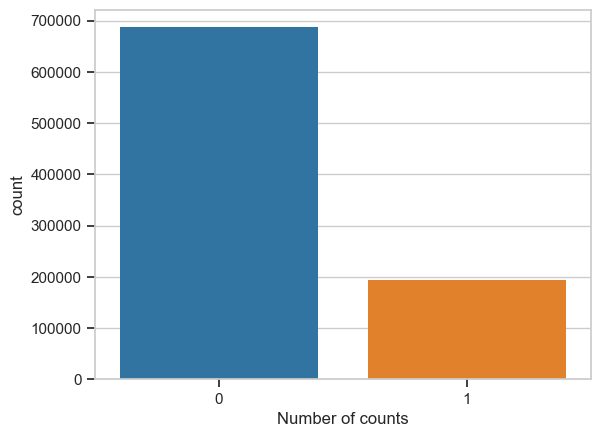

In [92]:
# Output Barplot showing the occurence of flight outcome

sb.set_context("notebook")
g=sb.countplot(x="FLIGHT_STATUS",data=df)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

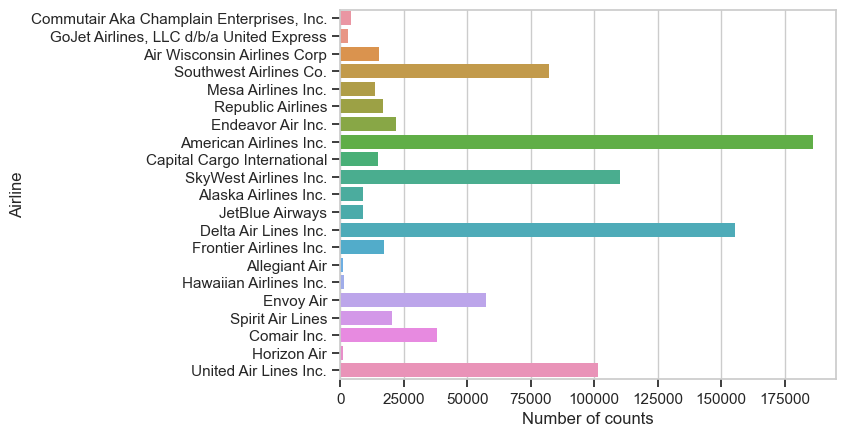

In [93]:
# Output Barplot showing the occurence of each categorical features         

sb.set_context("notebook")
g=sb.countplot(y="Airline",data=df_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

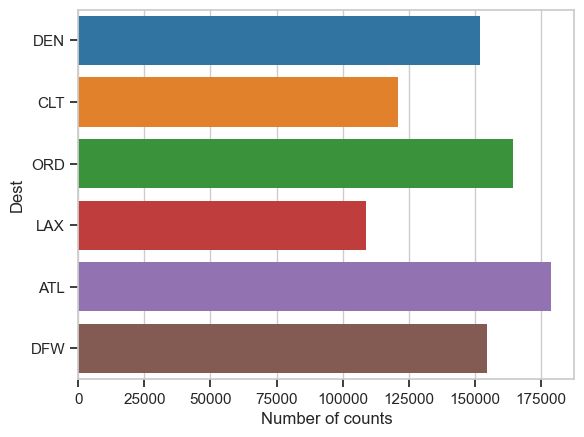

In [94]:
# Output Barplot showing the occurence of each categorical features         

sb.set_context("notebook")
g=sb.countplot(y="Dest",data=df_category)
g.set(xlabel="Number of counts")

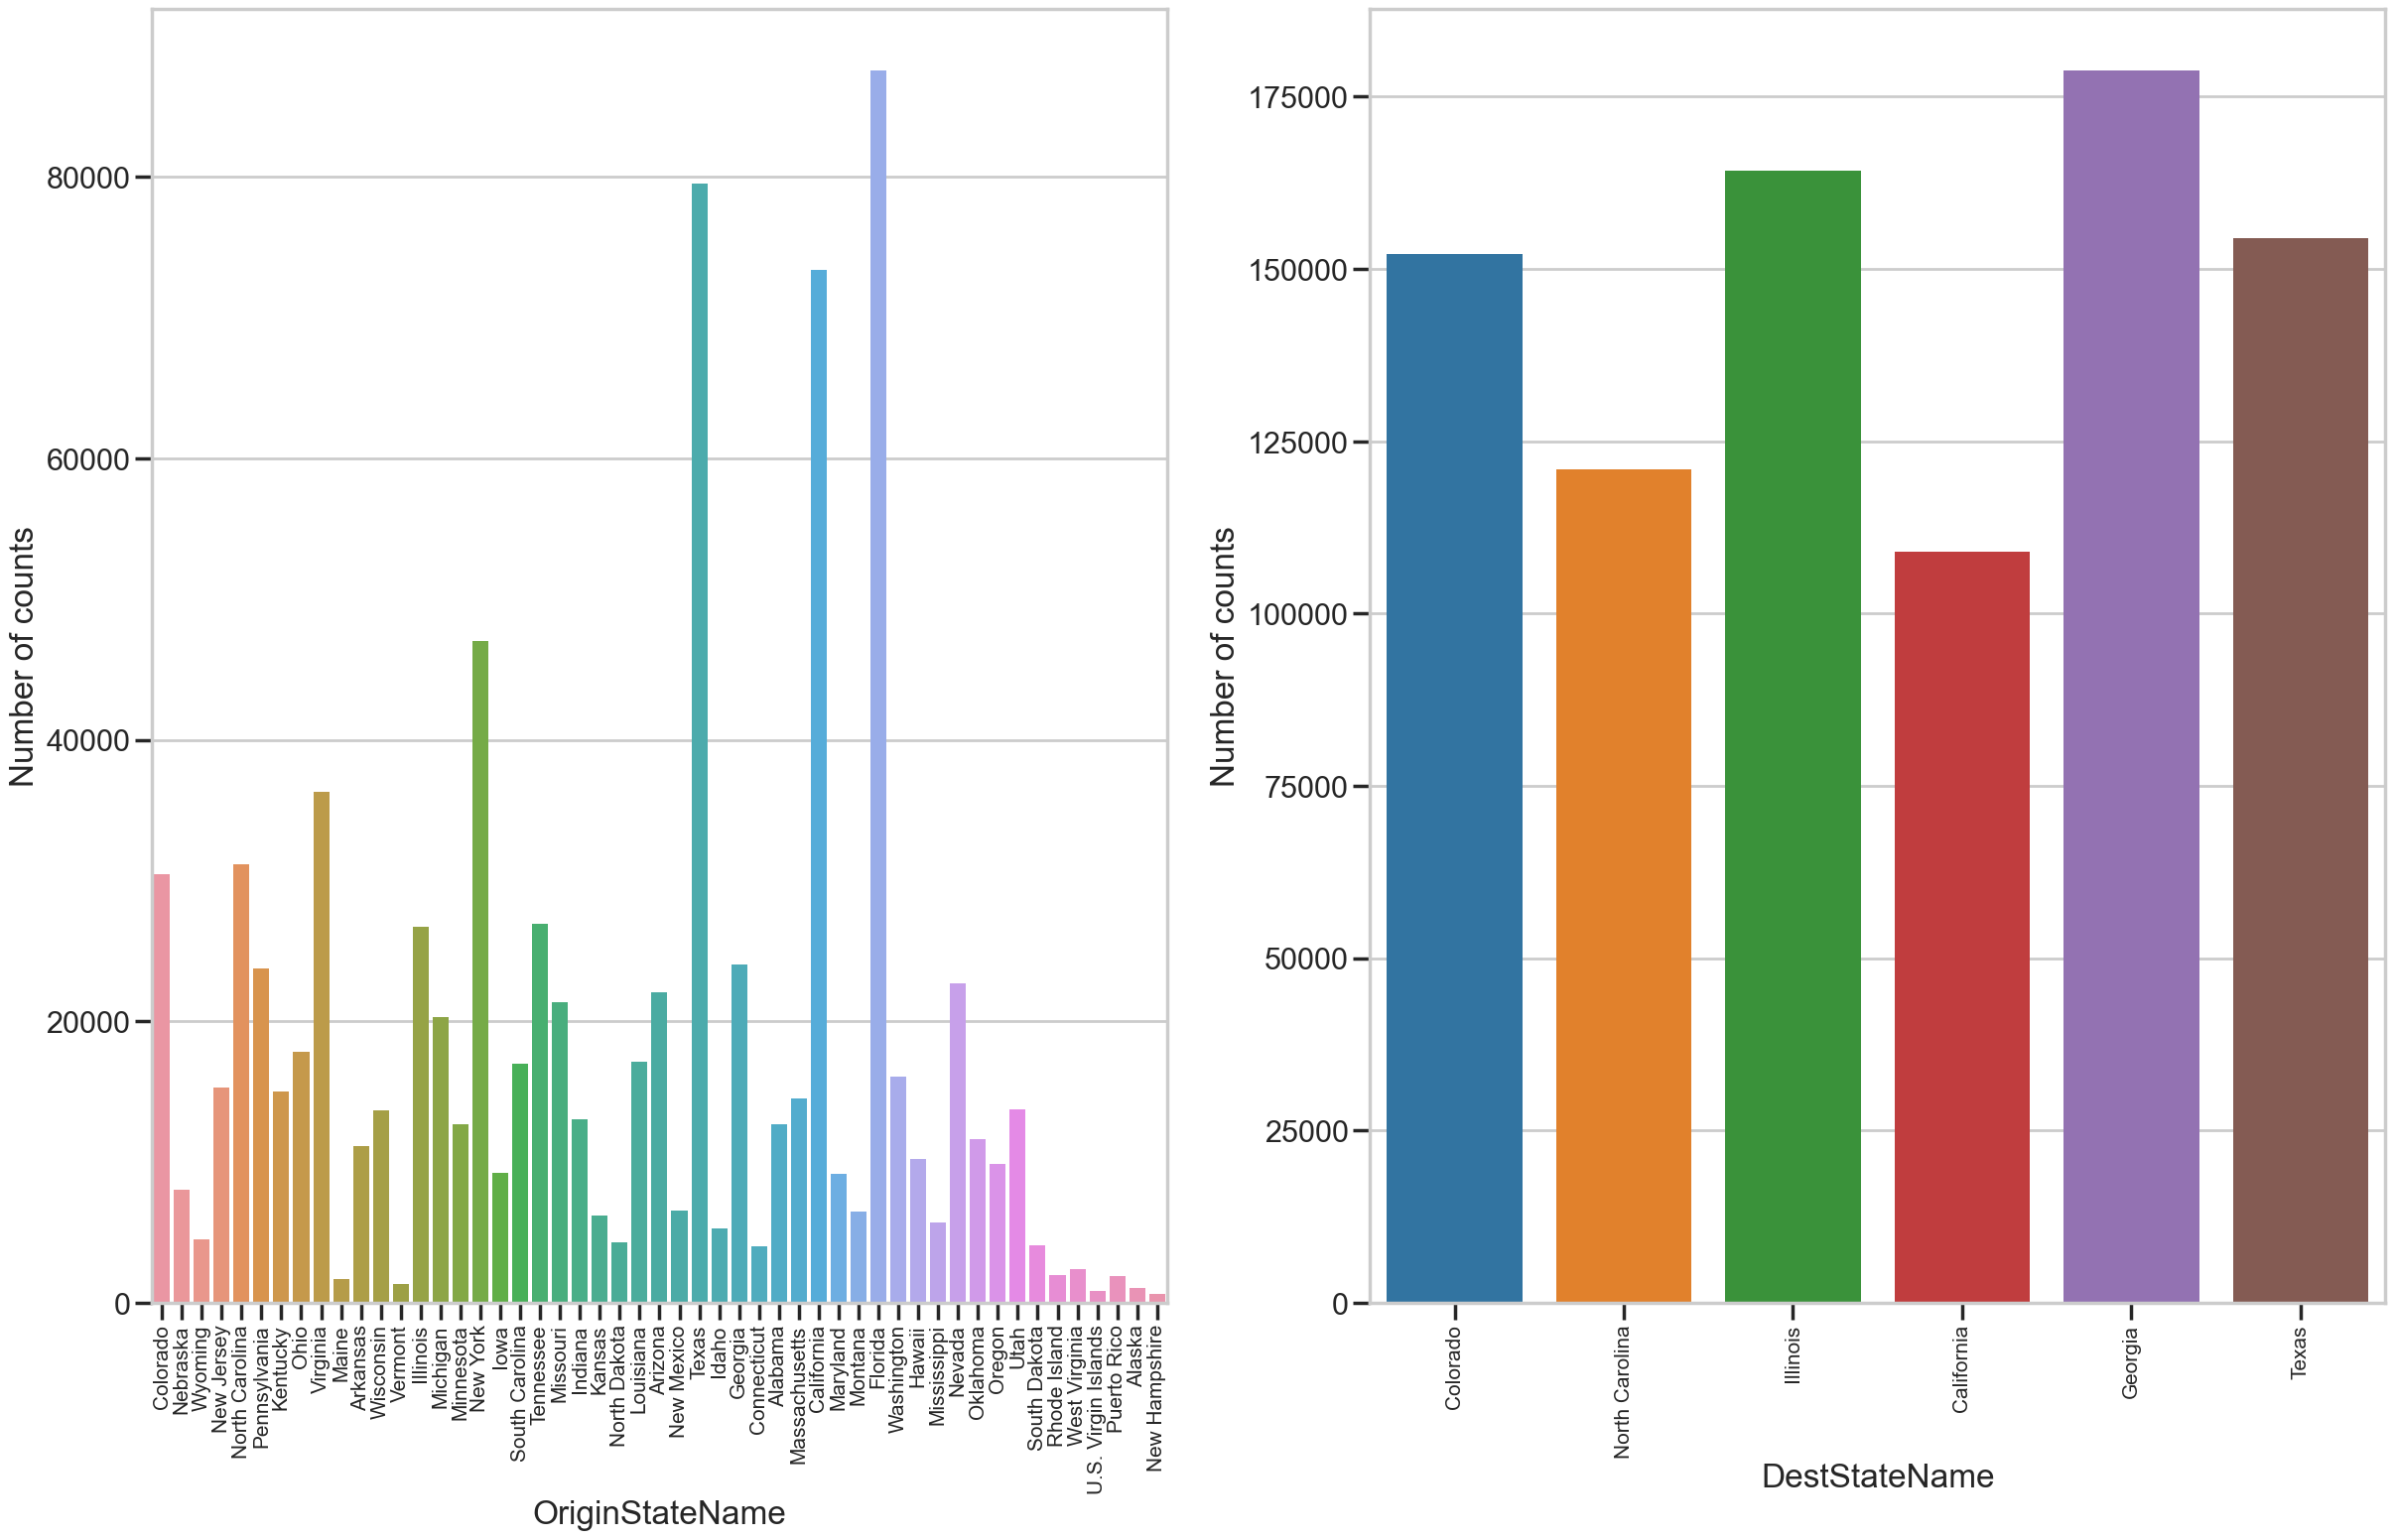

In [95]:
# Finding categorical features

category = []
for i in df_category:
    if i in ["Origin","Dest","Airline","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)
        
# Output Barplot showing the occurence of each categorical features         
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sb.color_palette("husl", 8)
sb.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(df_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sb.countplot(x=feature,data=df_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=90)
    plt.xticks(fontsize=15)

plt.show()


## Classification Modelling
### Data Preparation

    Encoding
    Feature Selection

One hot encoding for categorical attributes

We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.


In [96]:
Airline = pd.get_dummies(df['Airline'],drop_first=True)
Airline.head()

,Alaska Airlines Inc.,Allegiant Air,American Airlines Inc.,Capital Cargo International,Comair Inc.,"Commutair Aka Champlain Enterprises, Inc.",Delta Air Lines Inc.,Endeavor Air Inc.,Envoy Air,Frontier Airlines Inc.,"GoJet Airlines, LLC d/b/a United Express",Hawaiian Airlines Inc.,Horizon Air,JetBlue Airways,Mesa Airlines Inc.,Republic Airlines,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [97]:
df = pd.concat([df,Airline],axis=1)
df.head()

,FlightDate,Quarter,Month,DayofMonth,DayOfWeek,Airline,Origin,OriginStateName,Dest,DestStateName,Distance,Diverted,DepDelay,ArrDelay,AirTime,TaxiOut,TaxiIn,WHEELS_OFF_elapse,WHEELS_ON_elapse,CRSElapsedTime,ActualElapsedTime,DepartureDelayGroups,ArrivalDelayGroups,FLIGHT_STATUS,Alaska Airlines Inc.,Allegiant Air,American Airlines Inc.,Capital Cargo International,Comair Inc.,"Commutair Aka Champlain Enterprises, Inc.",Delta Air Lines Inc.,Endeavor Air Inc.,Envoy Air,Frontier Airlines Inc.,"GoJet Airlines, LLC d/b/a United Express",Hawaiian Airlines Inc.,Horizon Air,JetBlue Airways,Mesa Airlines Inc.,Republic Airlines,SkyWest Airlines Inc.,Southwest Airlines Co.,Spirit Air Lines,United Air Lines Inc.
0,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",GJT,Colorado,DEN,Colorado,212.0,False,-10.0,-17.0,40.0,17.0,8.0,17.0,8.0,72.0,65.0,-1.0,-2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",DRO,Colorado,DEN,Colorado,251.0,False,-15.0,-3.0,47.0,21.0,14.0,21.0,14.0,70.0,82.0,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",DRO,Colorado,DEN,Colorado,251.0,False,0.0,6.0,49.0,19.0,8.0,19.0,8.0,70.0,76.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",LNK,Nebraska,DEN,Colorado,423.0,False,-5.0,-18.0,69.0,11.0,7.0,11.0,7.0,100.0,87.0,-1.0,-2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,2022-04-04,2,4,4,1,"Commutair Aka Champlain Enterprises, Inc.",CPR,Wyoming,DEN,Colorado,230.0,False,-3.0,-7.0,39.0,17.0,17.0,17.0,17.0,77.0,73.0,-1.0,-1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:


# Drop the redundant columns 

df.drop(['FlightDate', 
                      'Airline',
                      'Dest',
                      'Origin',
                      'DayOfWeek',
                      'Quarter',
                      'OriginStateName',
                      'DestStateName',
                      'DepartureDelayGroups',
                      'ArrivalDelayGroups',
                 ],
                 axis = 1, inplace = True)



In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879764 entries, 0 to 4078315
Data columns (total 34 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Month                                      879764 non-null  int64  
 1   DayofMonth                                 879764 non-null  int64  
 2   Distance                                   879764 non-null  float64
 3   Diverted                                   879764 non-null  bool   
 4   DepDelay                                   879764 non-null  float64
 5   ArrDelay                                   879764 non-null  float64
 6   AirTime                                    879764 non-null  float64
 7   TaxiOut                                    879764 non-null  float64
 8   TaxiIn                                     879764 non-null  float64
 9   WHEELS_OFF_elapse                          879764 non-null  float64
 10  WHEELS_

In [100]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [101]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['FLIGHT_STATUS'], axis=1),
    df['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((703811, 33), (175953, 33))

In [102]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [103]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [104]:
sel.features_to_drop_

['Diverted']

In [105]:
# Drop the redundant columns 
df.drop(['Diverted'], axis = 1, inplace = True)

In [106]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((703811, 32), (175953, 32))

## Remove multicollinearity effect (Positive)
Multicollinearity is a phenomenon where two or more predictor variables in a regression model are highly correlated with each other, which can cause issues with model interpretation and prediction.

Positive multicollinearity occurs when two or more variables have a positive correlation, meaning that as one variable increases, the other variables also tend to increase. This can lead to coefficients being incorrectly estimated and can make it difficult to determine which variables are truly driving the outcome of interest.

Removing multicollinearity typically involves identifying highly correlated variables and either dropping one of the variables or creating a composite variable that summarizes the information from the correlated variables. By doing so, the model is less likely to overestimate the impact of certain variables and provides more reliable predictions.

In [107]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [108]:
corrmat

,feature1,feature2,corr
0,CRSElapsedTime,AirTime,0.988896
1,AirTime,CRSElapsedTime,0.988896
2,ActualElapsedTime,AirTime,0.986083
3,AirTime,ActualElapsedTime,0.986083
4,Distance,AirTime,0.982608
5,AirTime,Distance,0.982608
6,Distance,CRSElapsedTime,0.979671
7,CRSElapsedTime,Distance,0.979671
8,ActualElapsedTime,CRSElapsedTime,0.979597
9,CRSElapsedTime,ActualElapsedTime,0.979597


In [109]:
corrmat.feature1.unique()

array(['CRSElapsedTime', 'AirTime', 'ActualElapsedTime', 'Distance',
       'ArrDelay', 'DepDelay'], dtype=object)

In [110]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 2 correlated groups
out of 32 total features


In [111]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features 
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

         feature1           feature2      corr
0  CRSElapsedTime            AirTime  0.988896
7  CRSElapsedTime           Distance  0.979671
9  CRSElapsedTime  ActualElapsedTime  0.979597

    feature1  feature2      corr
10  ArrDelay  DepDelay  0.973479



In [112]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,CRSElapsedTime,AirTime,0.988896
7,CRSElapsedTime,Distance,0.979671
9,CRSElapsedTime,ActualElapsedTime,0.979597




In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.


In [113]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRSElapsedTime']

# train a random forest 
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [114]:
# get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ActualElapsedTime,0.411812
3,CRSElapsedTime,0.397839
1,Distance,0.113556
0,AirTime,0.076794


In [115]:
# Drop the redundant columns 
df.drop(['AirTime'], axis = 1, inplace = True)

## Remove multicollinearity effect (Negative)

In [116]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

In [117]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 32 total features


## Importance by Random Forest

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['FLIGHT_STATUS'], axis=1),
    df['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((703811, 31), (175953, 31))

In [119]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([9.05989970e-04, 1.39428957e-04, 1.24538724e-03, 2.89813538e-01,
       5.94657871e-01, 4.61665099e-02, 1.26746018e-02, 3.24757870e-02,
       1.42673098e-02, 1.20173269e-03, 4.05522117e-03, 2.22785753e-06,
       5.31288923e-07, 7.93494791e-06, 1.01516925e-05, 1.78397039e-05,
       1.34848099e-06, 3.75226361e-04, 6.26450304e-05, 3.90372312e-05,
       1.36567504e-04, 3.10239471e-07, 6.38481730e-07, 0.00000000e+00,
       3.62769406e-06, 2.02948159e-06, 1.29539919e-05, 4.79293182e-05,
       1.54558636e-03, 1.13518379e-04, 1.65180204e-05])

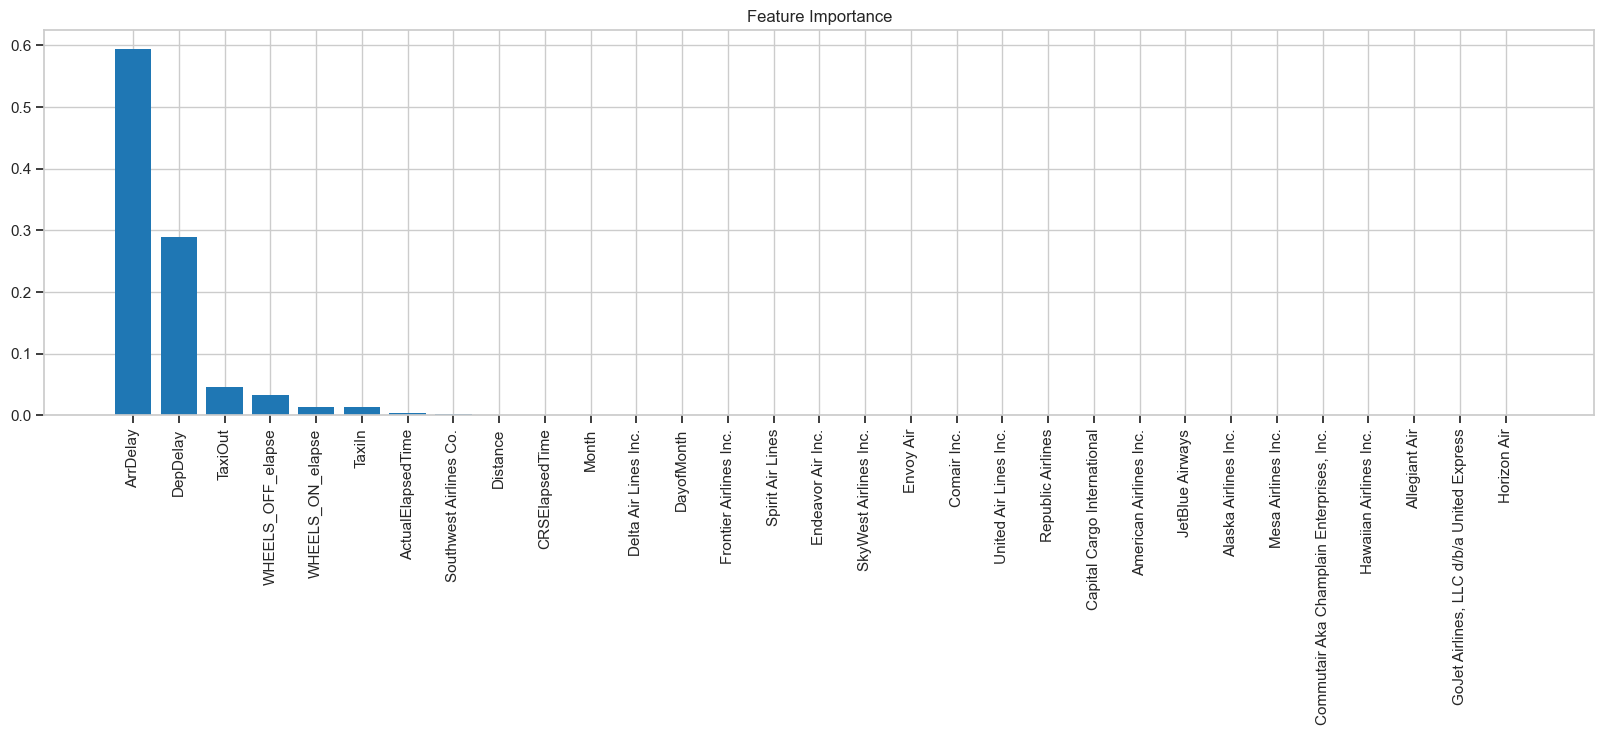

In [120]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1] 
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sb.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [121]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,ArrDelay,5.946579e-01
1,DepDelay,2.898135e-01
2,TaxiOut,4.616651e-02
3,WHEELS_OFF_elapse,3.247579e-02
4,WHEELS_ON_elapse,1.426731e-02
5,TaxiIn,1.267460e-02
6,ActualElapsedTime,4.055221e-03
7,Southwest Airlines Co.,1.545586e-03
8,Distance,1.245387e-03
9,CRSElapsedTime,1.201733e-03


## Classification Modelling

In [122]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score, 
    accuracy_score, 
    confusion_matrix, 
    classification_report,
)

## Base classifiers

    Logistic regression
    Decision Tree
    Random Forest



### Random Forest

In [123]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [124]:
run_randomForests(X_train, X_test, y_train, y_test)

Test set
Roc-auc Random Forests roc-auc: 1.0

Accuracy Random Forest test: 1.0

Precision Random Forest test: 1.0

Recall Random Forest test: 1.0

F-measure Random Forest test: 1.0

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       1.00      1.00      1.00     38921

    accuracy                           1.00    175953
   macro avg       1.00      1.00      1.00    175953
weighted avg       1.00      1.00      1.00    175953



### Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [127]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9997685323061355

Accuracy Logistic Regression: 0.9929299301518019

Precision Logistic Regression: 0.9829765414690425

Recall Logistic Regression: 0.9850980190642584

F-measure Logistic Regression: 0.9840361368477788

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       0.98      0.99      0.98     38921

    accuracy                           0.99    175953
   macro avg       0.99      0.99      0.99    175953
weighted avg       0.99      0.99      0.99    175953



### Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

In [130]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 1.0

Accuracy Decision Tree: 1.0

Precision Decision Tree: 1.0

Recall Decision Tree: 1.0

F-measure Decision Tree: 1.0

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       1.00      1.00      1.00     38921

    accuracy                           1.00    175953
   macro avg       1.00      1.00      1.00    175953
weighted avg       1.00      1.00      1.00    175953



### Undersampling technique
Undersampling is a technique used in machine learning to balance imbalanced datasets, where one class (e.g., the positive class) has significantly fewer observations than another class (e.g., the negative class). In undersampling, a portion of the majority class (negative class) is randomly removed to make the number of observations in both classes more balanced. This helps to prevent the model from being biased towards the majority class and improves its ability to classify the minority class. However, undersampling can also result in the loss of useful information, especially if the minority class is already small.

    Logistic regression
    Decision Tree
    Random Forest


In [131]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks
)
from sklearn.metrics import precision_recall_curve

In [132]:
def run_all(X_train, X_test, y_train, y_test):

    # Logistic regression
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)
    
    print('Logistic regression')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression test:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression test:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression test:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression test:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))
    
    # Decision Tree
    DT = DecisionTreeClassifier(random_state=100)
    DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))

    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)
    
    print('Random Forest')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))
    
    print()
    print()
    print('Precision Recall Curve')
    precision, recall, _ = precision_recall_curve(y_test, pred[:,1])
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')

In [133]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=100,
        replacement=False)
}

In [134]:
datasets_ls = ['df']

Full data
Logistic regression
Roc-auc Logistic Regression roc-auc: 0.9997685323061355

Accuracy Logistic Regression test: 0.9929299301518019

Precision Logistic Regression test: 0.9829765414690425

Recall Logistic Regression test: 0.9850980190642584

F-measure Logistic Regression test: 0.9840361368477788

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       0.98      0.99      0.98     38921

    accuracy                           0.99    175953
   macro avg       0.99      0.99      0.99    175953
weighted avg       0.99      0.99      0.99    175953

Test set
Roc-auc Decision Tree roc-auc: 1.0

Accuracy Decision Tree: 1.0

Precision Decision Tree: 1.0

Recall Decision Tree: 1.0

F-measure Decision Tree: 1.0

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       1.00      1.00      1.00     38921

    accur

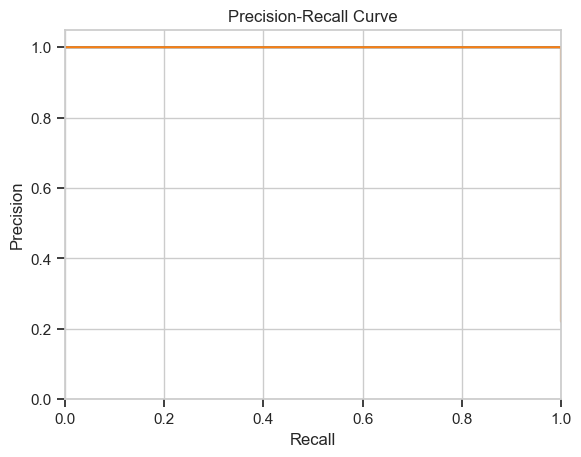

In [135]:
for dataset in datasets_ls:
    
    print('Full data')
        
    run_all(X_train, X_test, y_train, y_test)
    
    print()
    
    for undersampler in undersampler_dict.keys():
        
        print(undersampler)
        
        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)
        
        run_all(X_resampled, X_test, y_resampled, y_test)
        
        print()

### Oversampling

In [136]:
from imblearn.over_sampling import (
    RandomOverSampler
)

In [137]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=100)
}

df
Logistic regression
Roc-auc Logistic Regression roc-auc: 0.9997685323061355

Accuracy Logistic Regression test: 0.9929299301518019

Precision Logistic Regression test: 0.9829765414690425

Recall Logistic Regression test: 0.9850980190642584

F-measure Logistic Regression test: 0.9840361368477788

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       0.98      0.99      0.98     38921

    accuracy                           0.99    175953
   macro avg       0.99      0.99      0.99    175953
weighted avg       0.99      0.99      0.99    175953

Test set
Roc-auc Decision Tree roc-auc: 1.0

Accuracy Decision Tree: 1.0

Precision Decision Tree: 1.0

Recall Decision Tree: 1.0

F-measure Decision Tree: 1.0

Summary Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    137032
           1       1.00      1.00      1.00     38921

    accuracy    

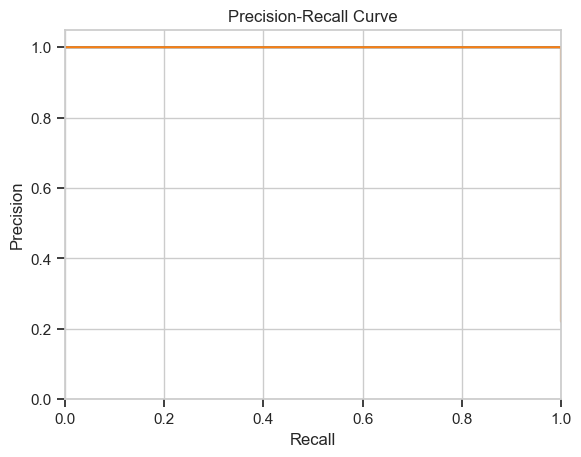

In [138]:
for dataset in datasets_ls:
    
    print(dataset)
    
    run_all(X_train, X_test, y_train, y_test)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        print("Status check: Done resampling")
        # evaluate performance
        run_all(X_resampled, X_test, y_resampled, y_test)
        print()
        
    print()
